In [50]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr

import env
import wrangle
from wrangle import get_zillow_data
from wrangle import wrangle_zillow
from wrangle import split_data

1. As with encoded vs. unencoded data, we recommend exploring un-scaled data in your EDA process.

In [13]:
df = wrangle_zillow()
df.head()

,id,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
4,20,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
6,31,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,33,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
11,62,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0
14,97,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0


2. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [15]:
train, validate, test = split_data(df)
train.head(), validate.head(), test.head()

(             id  bedroomcnt  bathroomcnt  calculatedfinishedsquarefeet  \
 495548   686613         3.0          2.0                        1409.0   
 689822   955373         4.0          4.0                        3523.0   
 749306  1037817         5.0          3.0                        2599.0   
 331405   458639         4.0          2.5                        3138.0   
 505478   699684         5.0          5.0                        3562.0   
 
         taxvaluedollarcnt  yearbuilt  taxamount    fips  
 495548           488000.0     1997.0    5170.66  6111.0  
 689822           875000.0     1990.0    9833.34  6111.0  
 749306           847733.0     1963.0   10116.68  6037.0  
 331405           621882.0     1978.0    5725.32  6059.0  
 505478           602159.0     2001.0    9722.20  6037.0  ,
               id  bedroomcnt  bathroomcnt  calculatedfinishedsquarefeet  \
 437946    606504         3.0          2.0                        1332.0   
 1677111  2322517         4.0          2.

In [16]:
x_train = train.drop(columns=['taxvaluedollarcnt', 'id'])
y_train = train.taxvaluedollarcnt

x_validate = validate.drop(columns=['taxvaluedollarcnt', 'id'])
y_validate = validate.taxvaluedollarcnt

x_test = test.drop(columns=['taxvaluedollarcnt', 'id'])
y_test = test.taxvaluedollarcnt

x_train.dtypes

bedroomcnt                      float64
bathroomcnt                     float64
calculatedfinishedsquarefeet    float64
yearbuilt                       float64
taxamount                       float64
fips                            float64
dtype: object

3. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [ ]:
def plot_variable_pairs(train): 
    sns.pairplot(data = train, corner=True)
    plt.show()


        

4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [43]:
def plot_categorical_and_continuous_vars(train):
        sns.stripplot(x='bedroomcnt', y='yearbuilt', data=train)
        plt.show()
        sns.stripplot(x='bedroomcnt', y='bathroomcnt', data=train)
        plt.show()
        sns.stripplot(x='bedroomcnt', y='calculatedfinishedsquarefeet', data=train)
        plt.show()
        sns.stripplot(x='bedroomcnt', y='taxamount', data=train)
        plt.show()
        sns.stripplot(x='bedroomcnt', y='taxvaluedollarcnt', data=train)
        plt.show()
        sns.stripplot(x='fips', y='yearbuilt', data=train)
        plt.show()
        sns.stripplot(x='fips', y='bathroomcnt', data=train)
        plt.show()
        sns.stripplot(x='fips', y='calculatedfinishedsquarefeet', data=train)
        plt.show()
        sns.stripplot(x='fips', y='taxamount', data=train)
        plt.show()
        sns.stripplot(x='fips', y='taxvaluedollarcnt', data=train)
        plt.show()
    

5. Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

In [ ]:
from explore import plot_categorical_and_continuous_vars, plot_variable_pairs

6. Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

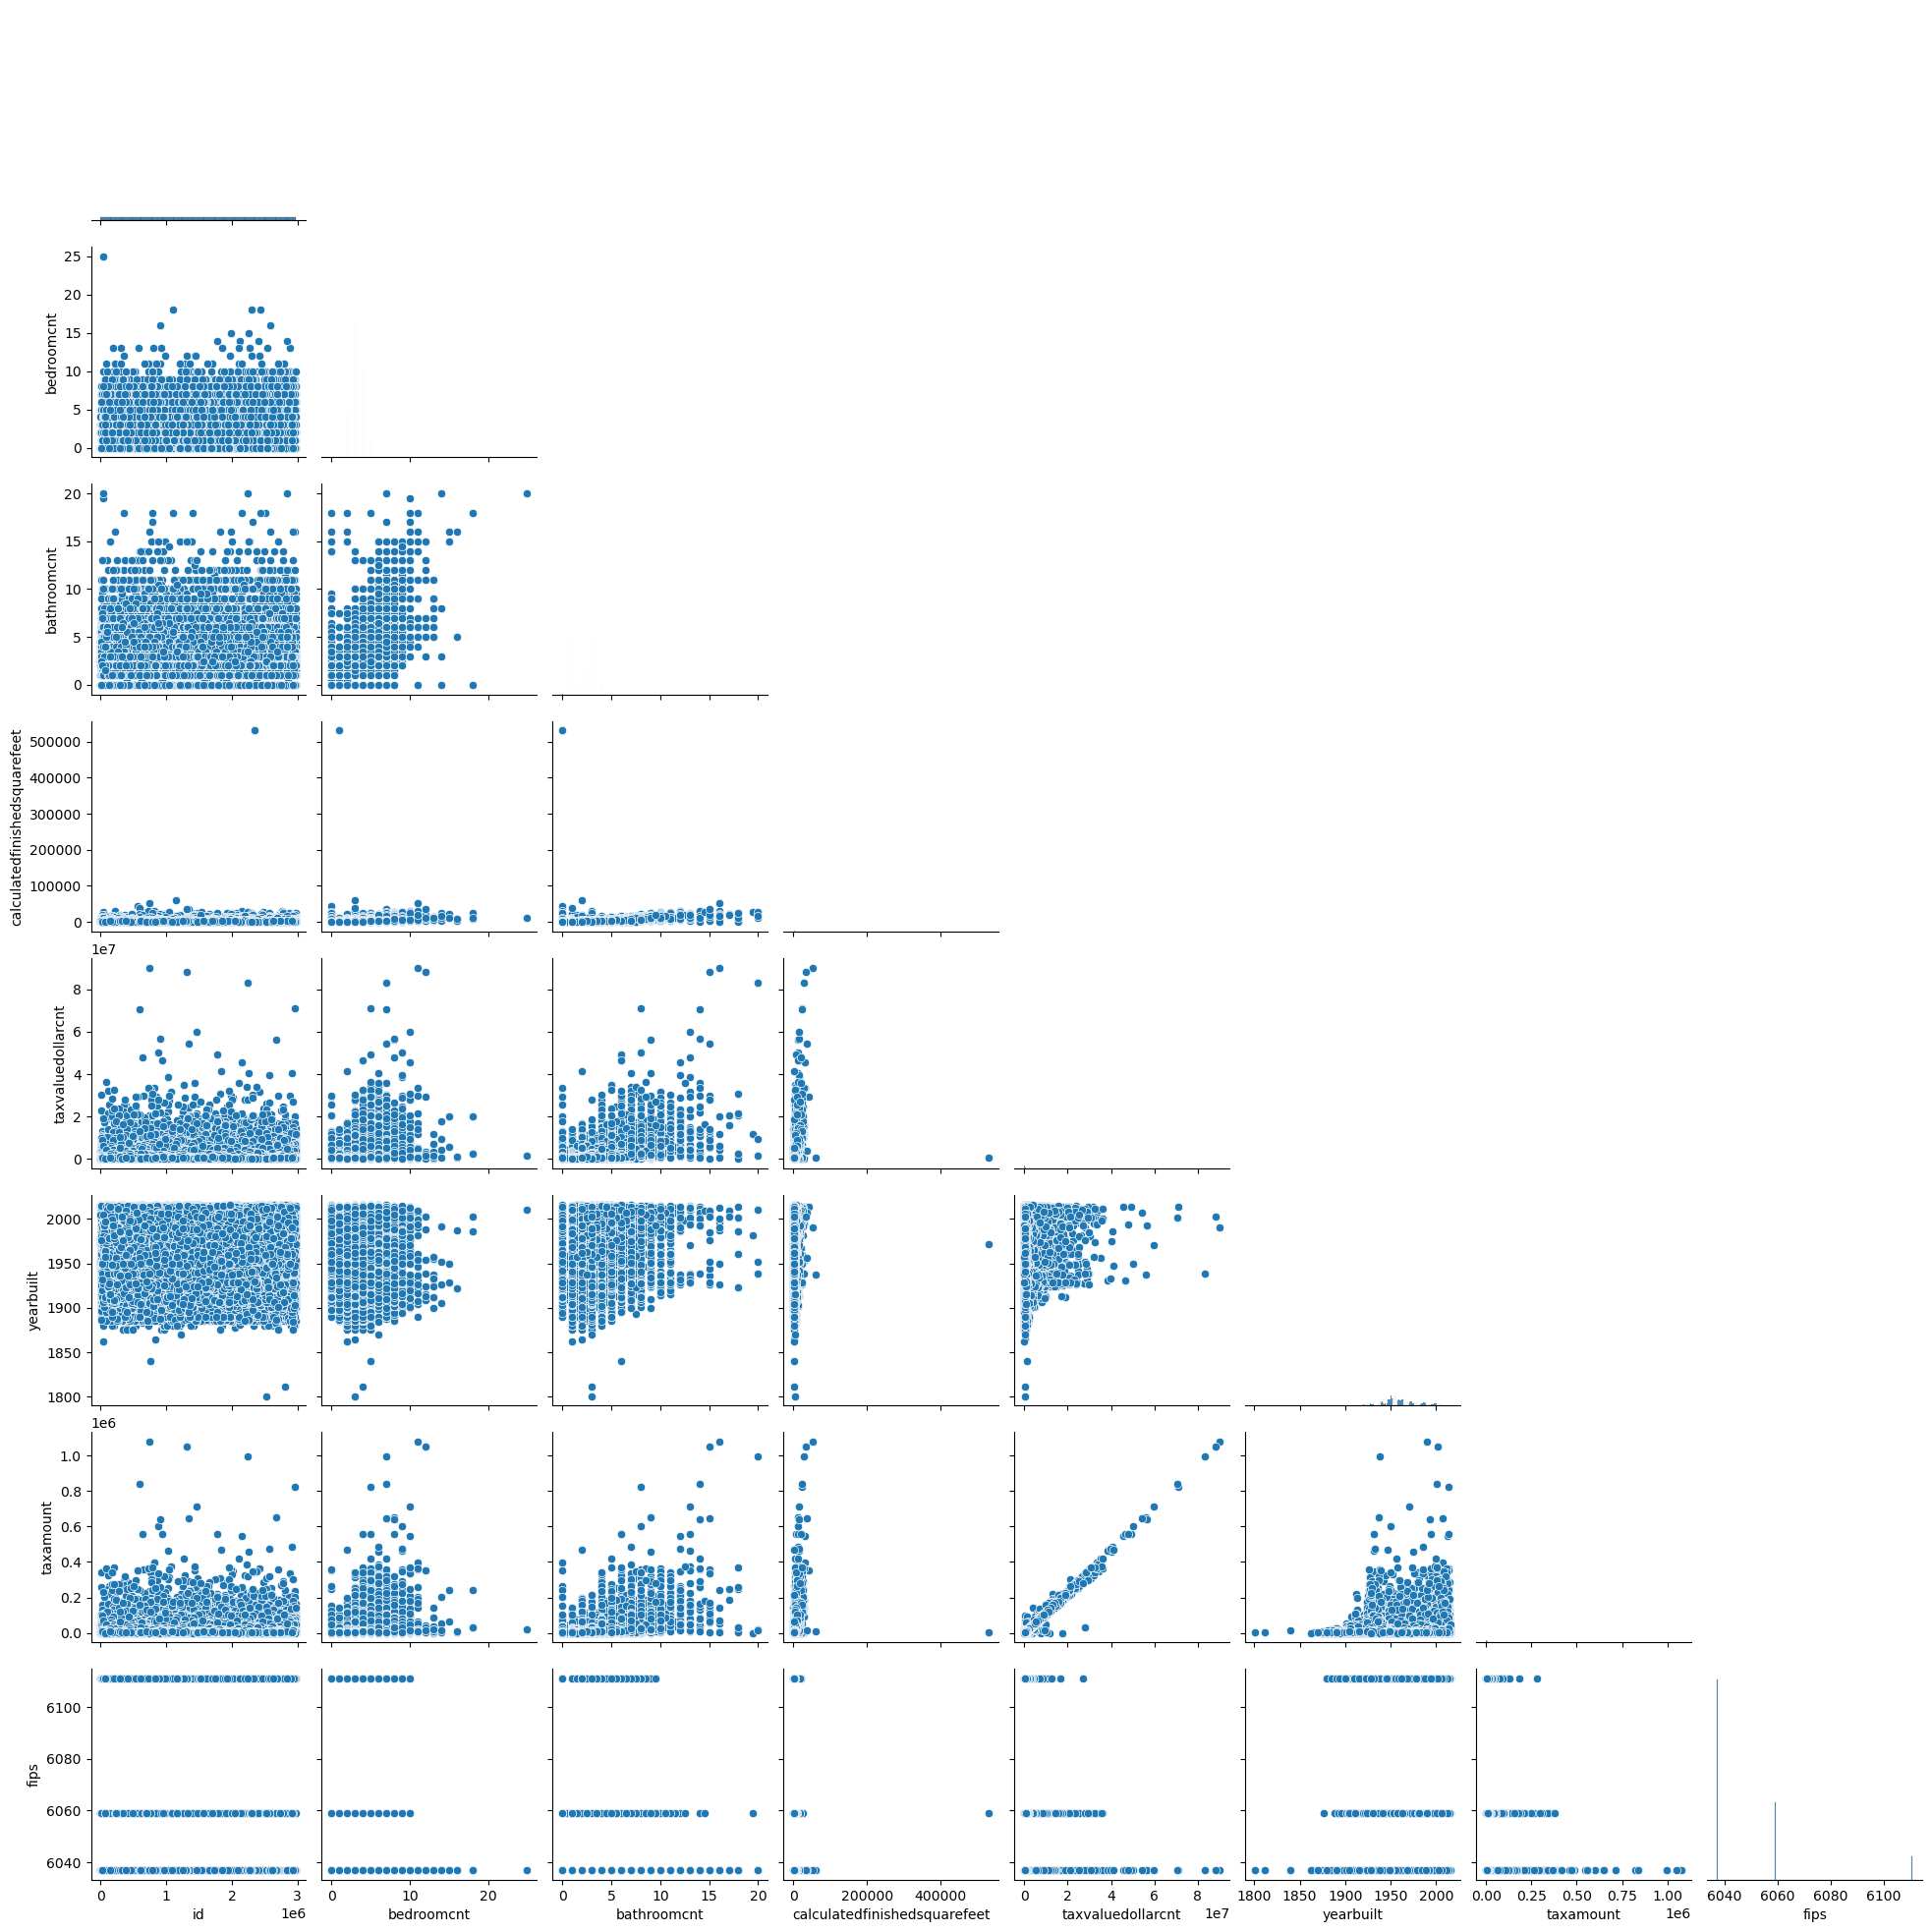

In [20]:
plot_variable_pairs(train)

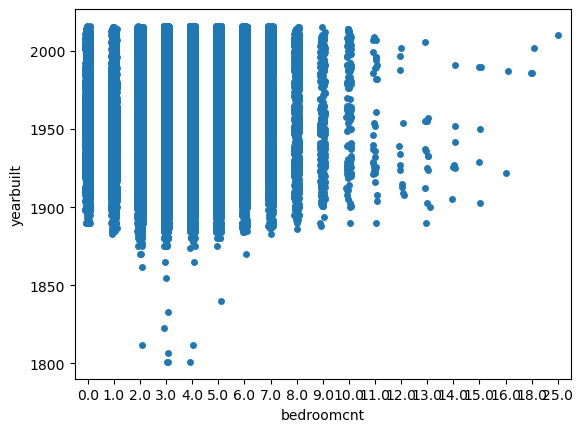

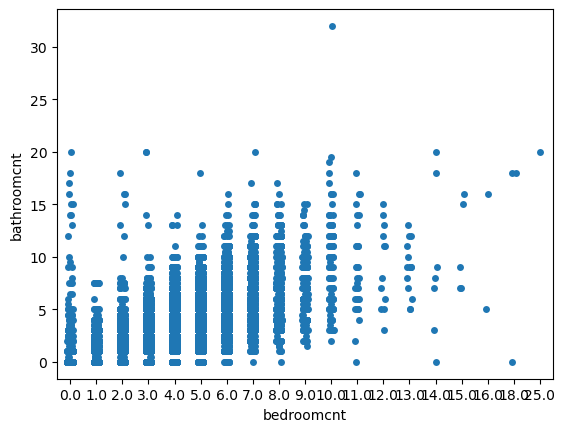

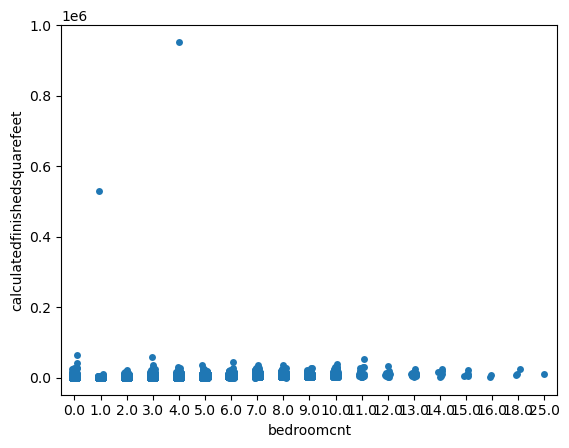

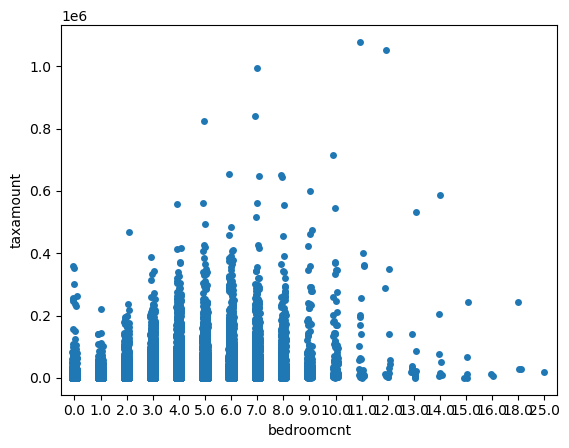

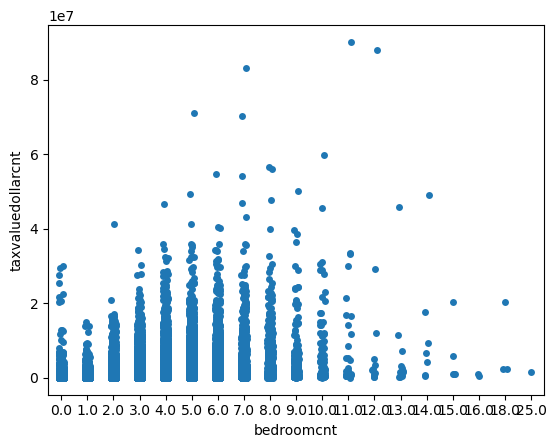

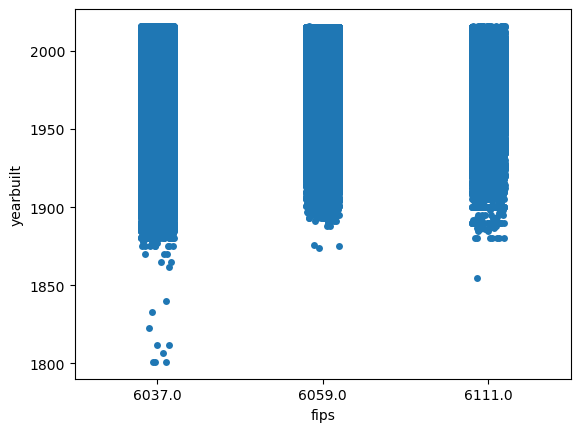

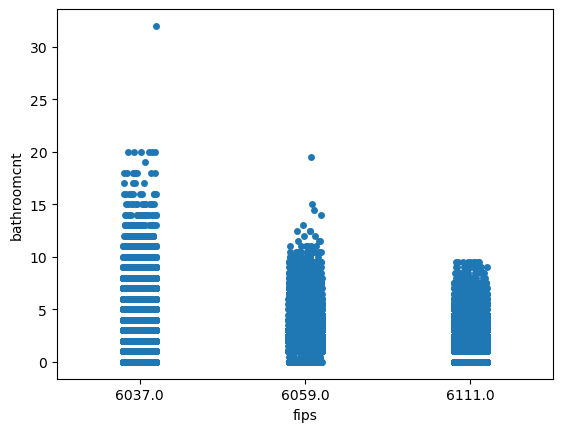

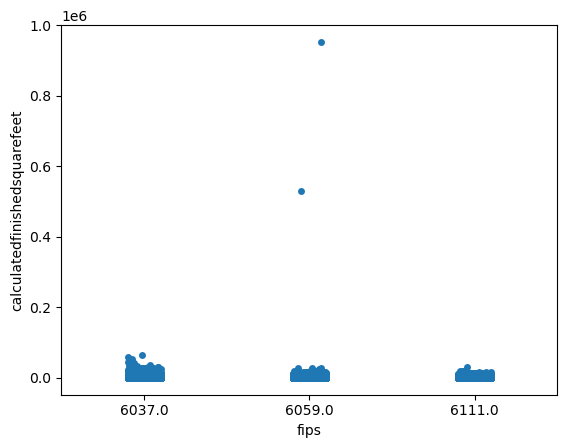

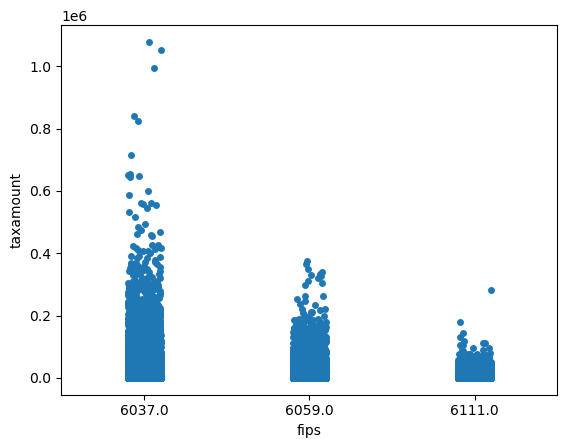

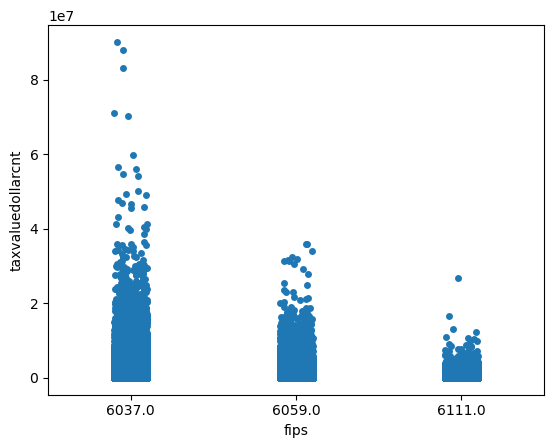

In [44]:
plot_categorical_and_continuous_vars(df)

7. Come up with some initial hypotheses based on your goal of predicting property value.



Ha1: Tax amount and tax value will be  correlated
Ho1: Tax amount and tax value will not be correlated

Ha2: fips and tax value are related
Ho2: fips and tax value are not statistically significantly related

Alpha = .05

8. Visualize all combinations of variables in some way.

done in question 6, will do with specific hypotheses below

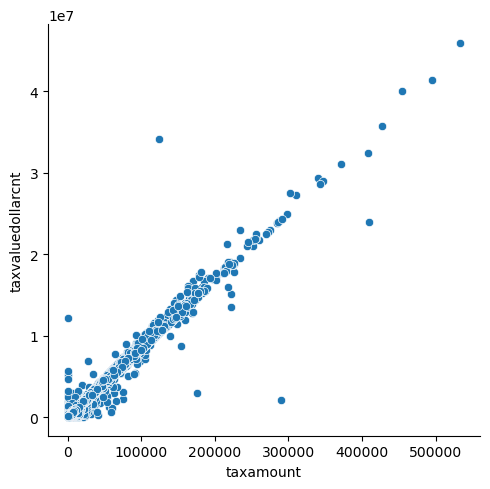

In [39]:
sns.relplot(x='taxamount', y='taxvaluedollarcnt', data=test)
plt.show()

tax value and home value seem highly correlated

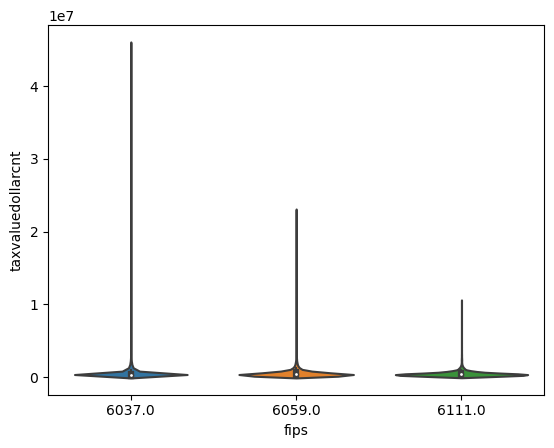

In [41]:
sns.violinplot(x='fips', y='taxvaluedollarcnt', data=test)
plt.show()

fips code 6037 has many more outliers than the others

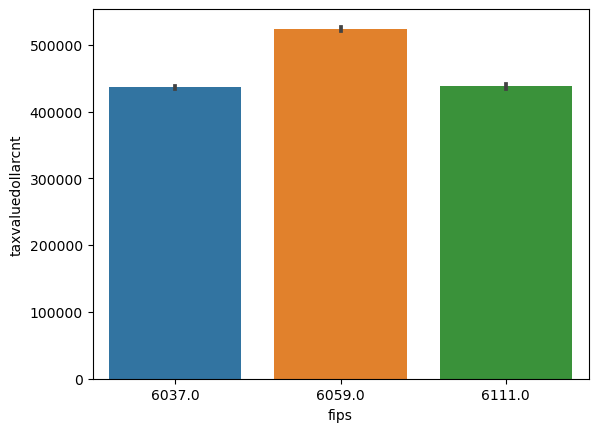

In [42]:
sns.barplot(x='fips', y='taxvaluedollarcnt', data=test)
plt.show()

fips 6059 seems higher than either other fips code

9. Run the appropriate statistical tests where needed.

In [59]:
orange_county = test[test.fips == 6059.0].taxvaluedollarcnt
los_angeles = test[test.fips == 6037.0].taxvaluedollarcnt
ventura_county = test[test.fips == 6111.0].taxvaluedollarcnt


In [60]:
ventura_county

43242       478414.0
484350      482000.0
1443588     337297.0
2077575      49732.0
571236      647206.0
             ...    
862179     2006000.0
1820201     525210.0
408564      943256.0
904708      742243.0
452412      291538.0
Name: taxvaluedollarcnt, Length: 32358, dtype: float64

In [61]:
f, p = stats.f_oneway(orange_county, los_angeles, ventura_county)
f, p

(744.7927624400587, 1.5e-323)

There is a statistically significant difference between means in tax value in each fips group

10. What independent variables are correlated with the dependent variable, home value?

In [45]:
exam_corr = train.corr(method='spearman')
exam_corr

,id,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
id,1.000000,0.002019,0.002220,0.001576,0.001896,0.001973,0.001937,0.001519
bedroomcnt,0.002019,1.000000,0.634460,0.655443,0.295711,0.426728,0.297181,0.177412
bathroomcnt,0.002220,0.634460,1.000000,0.826132,0.482145,0.570906,0.481714,0.185128
calculatedfinishedsquarefeet,0.001576,0.655443,0.826132,1.000000,0.523317,0.512731,0.520888,0.185078
taxvaluedollarcnt,0.001896,0.295711,0.482145,0.523317,1.000000,0.290809,0.978594,0.149971
yearbuilt,0.001973,0.426728,0.570906,0.512731,0.290809,1.000000,0.289221,0.412507
taxamount,0.001937,0.297181,0.481714,0.520888,0.978594,0.289221,1.000000,0.085126
fips,0.001519,0.177412,0.185128,0.185078,0.149971,0.412507,0.085126,1.000000


bathroom count, square feet, and tax amount

11. Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

square feet, bedroom count, and bathroom count are all correlated with each other. year built with both square feet and bathroom count

12. Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.

H1: We reject the null hypothesis

H2: We reject the null hypothesis

13. Explore your dataset with any other visualizations you think will be helpful.

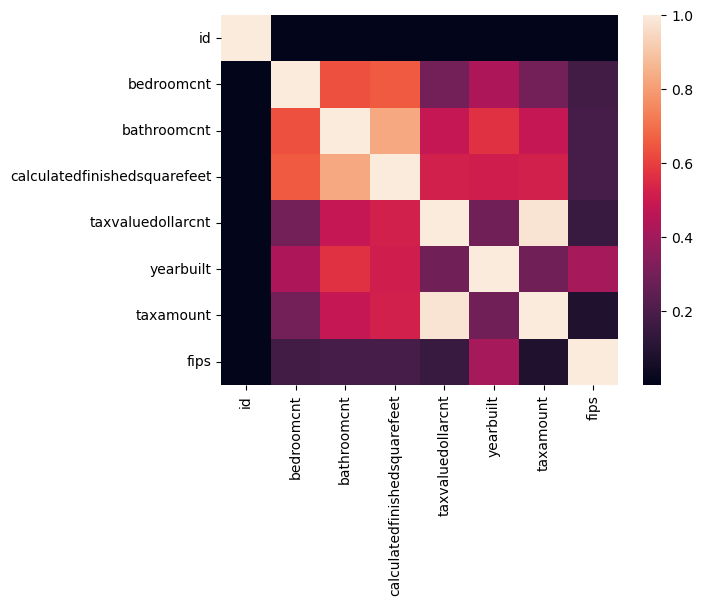

In [47]:
sns.heatmap(exam_corr)
plt.show()